# AutoML with Hyperband
In the following, we will use hyperband to find the optimal model and hyper-parameter for predicting the mpg values of cars. We will use the auto-mpg dataset from [UCI Archive](https://archive.ics.uci.edu/ml/datasets/Auto+MPG) (see the README file for more information).

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import hyperband
from sklearn.metrics import mean_squared_error

## Load Data
The encoding of origin is as follows. We will change this into a One-Hot-Encoding.
1) American
2) European
3) Japanese

In [3]:
header = ["mpg","cylinders","displacement","horsepower","weight","acceleration","model year","origin","car name"]
df = pd.read_csv("data/auto-mpg.data", sep='\s+', header=None)
df.columns = header
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [4]:
# drop NA values in horsepower column
index = np.where(df["horsepower"]=="?")[0]
df.replace("?",np.nan, inplace=True)
df = df.dropna()

In [5]:
# create One-Hot-Encoding for origin
df.loc[df["origin"] == 1, "american"] = 1
df.loc[df["origin"] == 2, "european"] = 1
df.loc[df["origin"] == 3, "japanese"] = 1
df.fillna(0, inplace=True)

del df["origin"]
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name,american,european,japanese
0,18.0,8,307.0,130.0,3504.0,12.0,70,chevrolet chevelle malibu,1.0,0.0,0.0
1,15.0,8,350.0,165.0,3693.0,11.5,70,buick skylark 320,1.0,0.0,0.0
2,18.0,8,318.0,150.0,3436.0,11.0,70,plymouth satellite,1.0,0.0,0.0
3,16.0,8,304.0,150.0,3433.0,12.0,70,amc rebel sst,1.0,0.0,0.0
4,17.0,8,302.0,140.0,3449.0,10.5,70,ford torino,1.0,0.0,0.0


## Hyperband
Use a standard scaling to scale the data.

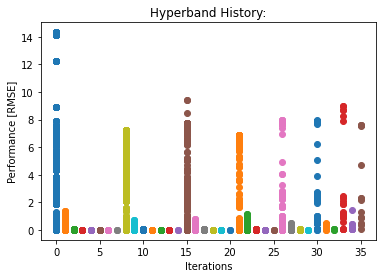

Min Model: Lasso(alpha=0.001)
RMSE: 0.0008214483835546943
RMSE on test set: 0.0009902217348193895


In [6]:
X = df.loc[:, df.columns != ('mpg' and 'car name')]
y = df.loc[:, df.columns == 'mpg']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, shuffle=True)
min_model, min_loss, preprocessing = hyperband.hyperband_algorithm(10000, X_train, y_train)
print("Min Model:",min_model)
print("RMSE:",min_loss)

X_train = preprocessing[0].transform(X_train)
X_test = preprocessing[0].transform(X_test)
min_model.fit(X_train,y_train)
pred = min_model.predict(X_test)

print("RMSE on test set:", mean_squared_error(y_test,pred,squared=False))